In [1]:
import numpy as np
import csv
import pandas as pd

from collections import Counter
from numpy import linalg as LA

In [2]:
with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.data") as input_file:
   lines = input_file.readlines()
   newLines = []
   for line in lines:
      newLine = line.strip().split()
      newLines.append(newLine)

with open("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv", 'w') as test_file:
   file_writer = csv.writer(test_file)
   file_writer.writerows(newLines)

In [3]:
# reading csv files
data =  pd.read_csv("/content/drive/MyDrive/CIn/Mestrado/2021.1/Aprendizagem de Máquina/Projeto - Francisco/yeast.csv",
                    names=["sequence_name", "mcg", "gvh", "alm", "mit", "erl", "pox", "vac", "nuc", "protein_local"])
print(data)

     sequence_name   mcg   gvh   alm   mit  erl  pox   vac   nuc protein_local
0       ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22           MIT
1       ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22           MIT
2       ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22           MIT
3       AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22           NUC
4       AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22           MIT
...            ...   ...   ...   ...   ...  ...  ...   ...   ...           ...
1479    YUR1_YEAST  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22           ME2
1480    ZIP1_YEAST  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47           NUC
1481    ZNRP_YEAST  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22           ME2
1482    ZUO1_YEAST  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39           NUC
1483    G6PD_YEAST  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22           CYT

[1484 rows x 10 columns]


In [4]:
X = data.iloc[:, 1:9].values
y = data.iloc[:, 9].values

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(random_state=0,multi_class="ovr").fit(X, y)
predict = clf.predict(X)

accuracy_score(y,predict)

0.555256064690027

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

accuracy = []
precision = []
recall = []
f_measure = []

skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X,y):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  clf = LogisticRegression(random_state=0,multi_class="ovr").fit(X_train, y_train)
  lr_predict = clf.predict(X_test)
  
  accuracy.append(accuracy_score(y_test, lr_predict))
  precision.append(precision_score(y_test, lr_predict, average='macro',zero_division=0))
  recall.append(recall_score(y_test, lr_predict, average='macro',zero_division=0))
  f_measure.append(f1_score(y_test, lr_predict, average='macro',zero_division=0))

  print("accuracy: ",accuracy_score(y_test, lr_predict))

print("\nMean accuracy: ",sum(accuracy)/len(accuracy), "Std: ",np.std(accuracy))
print("Mean precision: ",sum(precision)/len(precision), "Std: ",np.std(precision))
print("Mean recall: ",sum(recall)/len(recall), "Std: ",np.std(recall))
print("Mean f_measure: ",sum(f_measure)/len(f_measure), "Std: ",np.std(f_measure))

accuracy:  0.5387205387205387
accuracy:  0.5656565656565656
accuracy:  0.5589225589225589
accuracy:  0.494949494949495
accuracy:  0.5540540540540541

Mean accuracy:  0.5424606424606424 Std:  0.025356459739866243
Mean precision:  0.4065435713256356 Std:  0.0211729656132976
Mean recall:  0.3107987730415226 Std:  0.015615980980184034
Mean f_measure:  0.3311316240378822 Std:  0.014857869946975903


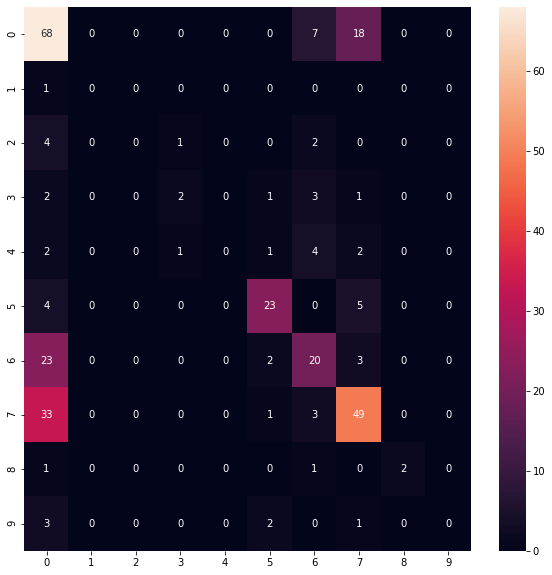

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

cf_matrix = confusion_matrix(y_test, lr_predict)

import seaborn as sns

sns.heatmap(cf_matrix, annot=True)

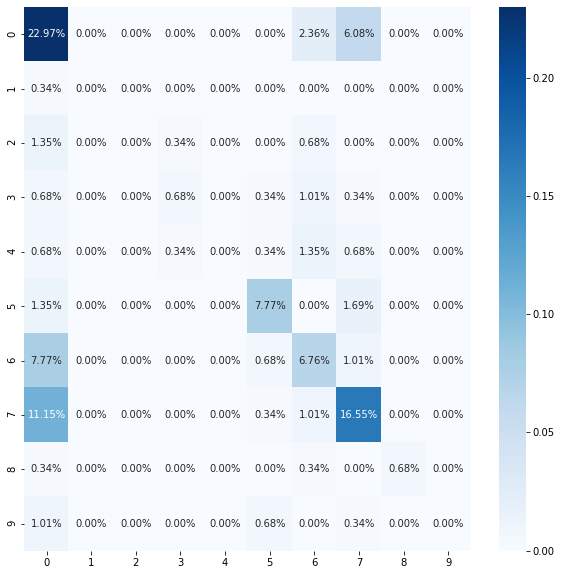

In [8]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [10]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

         CYT       0.48      0.73      0.58        93
         ERL       0.00      0.00      0.00         1
         EXC       0.00      0.00      0.00         7
         ME1       0.50      0.22      0.31         9
         ME2       0.00      0.00      0.00        10
         ME3       0.77      0.72      0.74        32
         MIT       0.50      0.42      0.45        48
         NUC       0.62      0.57      0.59        86
         POX       1.00      0.50      0.67         4
         VAC       0.00      0.00      0.00         6

    accuracy                           0.55       296
   macro avg       0.39      0.32      0.33       296
weighted avg       0.52      0.55      0.53       296



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
